# 1. Defining Problem Statement and Analyzing basic metrics

Problem Statement:

The problem statement revolves around analyzing customer purchase behavior, specifically the purchase amount, in relation to the customer's gender and various other factors. The primary objective is to understand if there are differences in spending habits between male and female customers during Black Friday. The dataset provided contains transactional data from Walmart Stores during this period.

Analyzing basic metrics

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [73]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/walmart_data.csv")

In [74]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [76]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [77]:
category_col = df.select_dtypes(include="object").columns

In [78]:
col = df.columns
for i in col:
  print(i,":",df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [79]:
df.describe(include="object")

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


**Distribution of Gender**

In [80]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [81]:
gen_val = df.groupby("Gender")["User_ID"].nunique()

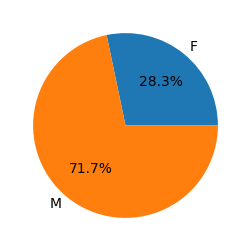

In [82]:
plt.figure(figsize=(3,3))
plt.pie(gen_val,labels=gen_val.index,autopct="%1.1f%%")
plt.show()

Observation: Distribution of gender who made purchase is 71.1% male and 28.3% female

In [83]:
df.groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


Observation:

* Mean and Median of Purchase done by male is almost similar to  female in the sample data. Therefore we cannot say it with clarity, who is spending more


* So need to statistically confirm it for the population data using Central Limit Theorem

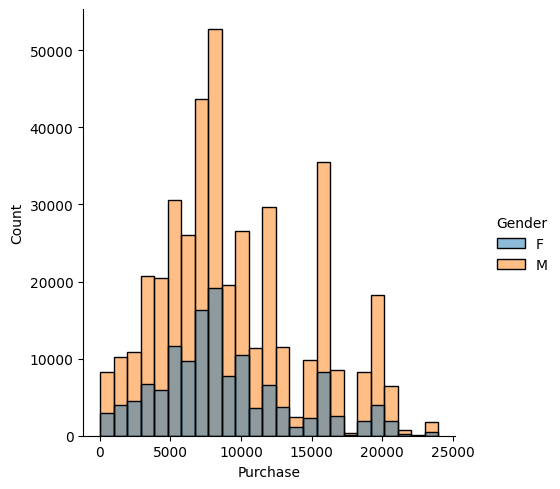

In [84]:
sns.displot(x = "Purchase", hue = "Gender", data = df, bins = 25)

Purchase is not well distributed. Even then we can apply CLT which result in normal distribution irrespective of the distribution of the population

In [92]:
male_sample_means = [df[df["Gender"] == "M"].sample(300, replace = True)["Purchase"].mean() for i in range(1000)]

In [91]:
female_sample_means = [df[df["Gender"] == "F"].sample(300, replace = True)["Purchase"].mean() for i in range(1000)]

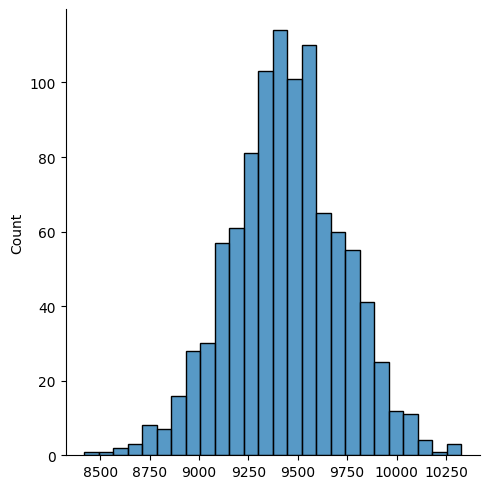

In [93]:
sns.displot(male_sample_means)

## Population mean is around this distribution and can check the exact value with the confidence interval which is done in the section 4.1 onwards

**Distribution of Maritial Status**

In [11]:
ms_val = df["Marital_Status"].value_counts()

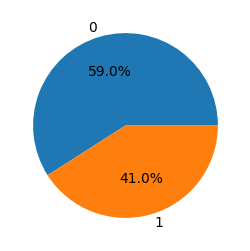

In [12]:
plt.figure(figsize=(3,3))
plt.pie(ms_val,labels=ms_val.index,autopct="%1.1f%%")
plt.show()

Observation: 59 % sales are done by unmarried people and 41% married people

**Distribution of Age**

<Axes: xlabel='Age', ylabel='count'>

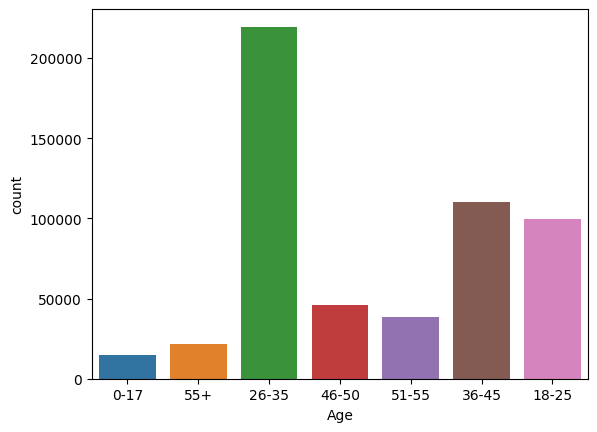

In [13]:
sns.countplot(data=df,x="Age")

Observation: Most of the purchase in the walmart is made by the age group 26-35

In [14]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


Which product category has high number of sales?

<Axes: xlabel='Product_Category', ylabel='count'>

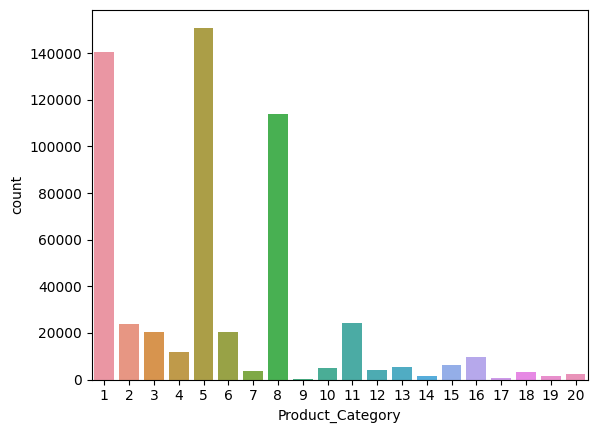

In [15]:
sns.countplot(data=df,x="Product_Category")

Observation: High number of sale happens in the product category 1,5,8

Text(0.5, 1.0, 'Ice hockey Sales trends')

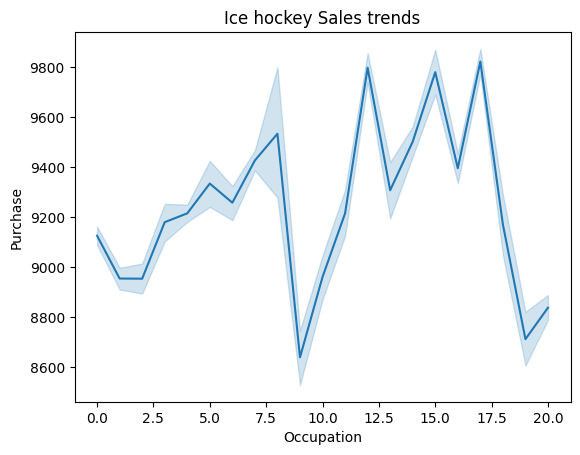

In [16]:
sns.lineplot(x="Occupation",y="Purchase",data=df)
plt.title("Ice hockey Sales trends")

Which gender has purchased for more amount

<Axes: xlabel='Gender', ylabel='Purchase'>

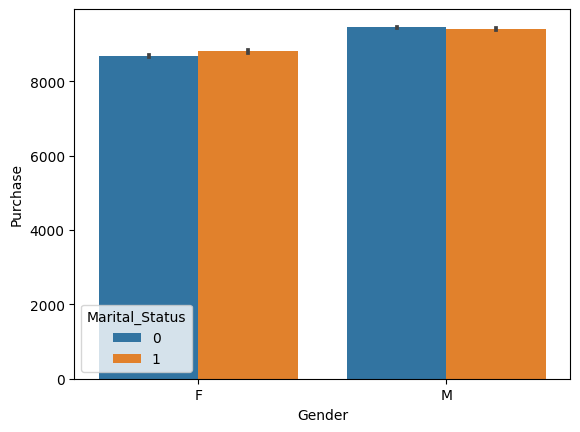

In [17]:
sns.barplot(data=df,x="Gender",y="Purchase",hue="Marital_Status")

Observation: Both male and female has purchased on average of 8000

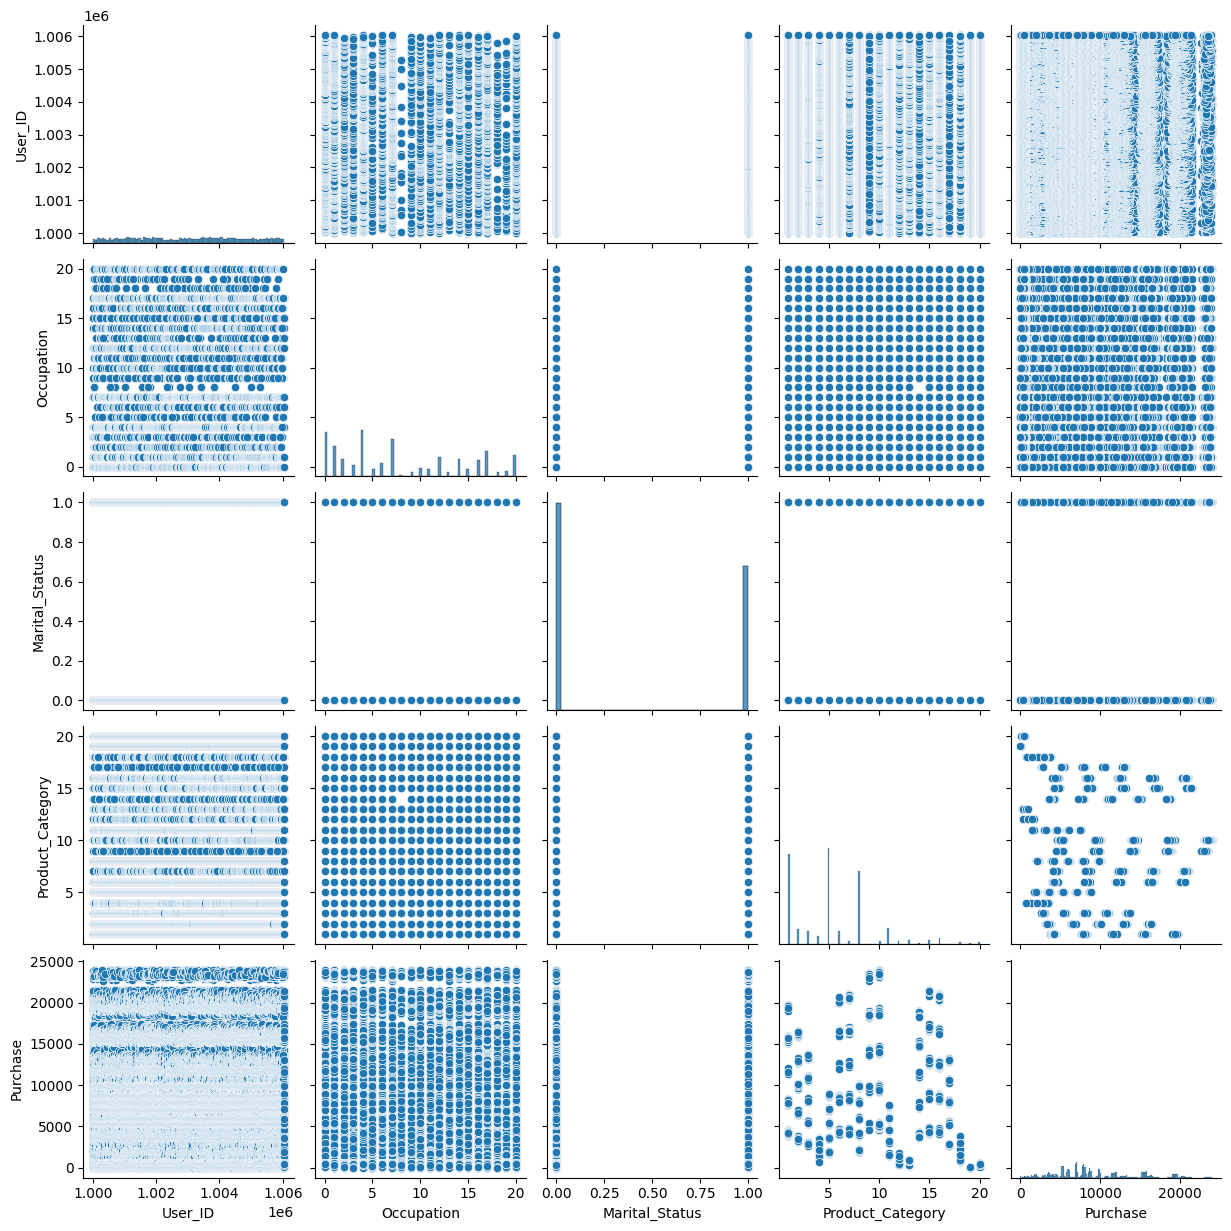

In [18]:
sns.pairplot(data=df)

<ipython-input-19-8fa699c4ca74>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="Blues",annot=True)


<Axes: >

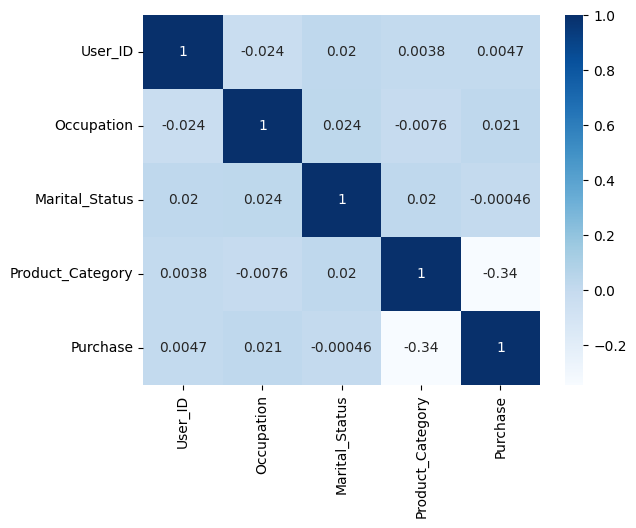

In [19]:
sns.heatmap(df.corr(),cmap="Blues",annot=True)

Observation: There is no correlation among the variables

# 2. Missing Values and Outliers

In [20]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Observation: There is no missing values in the dataset

In [21]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
numeric_columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

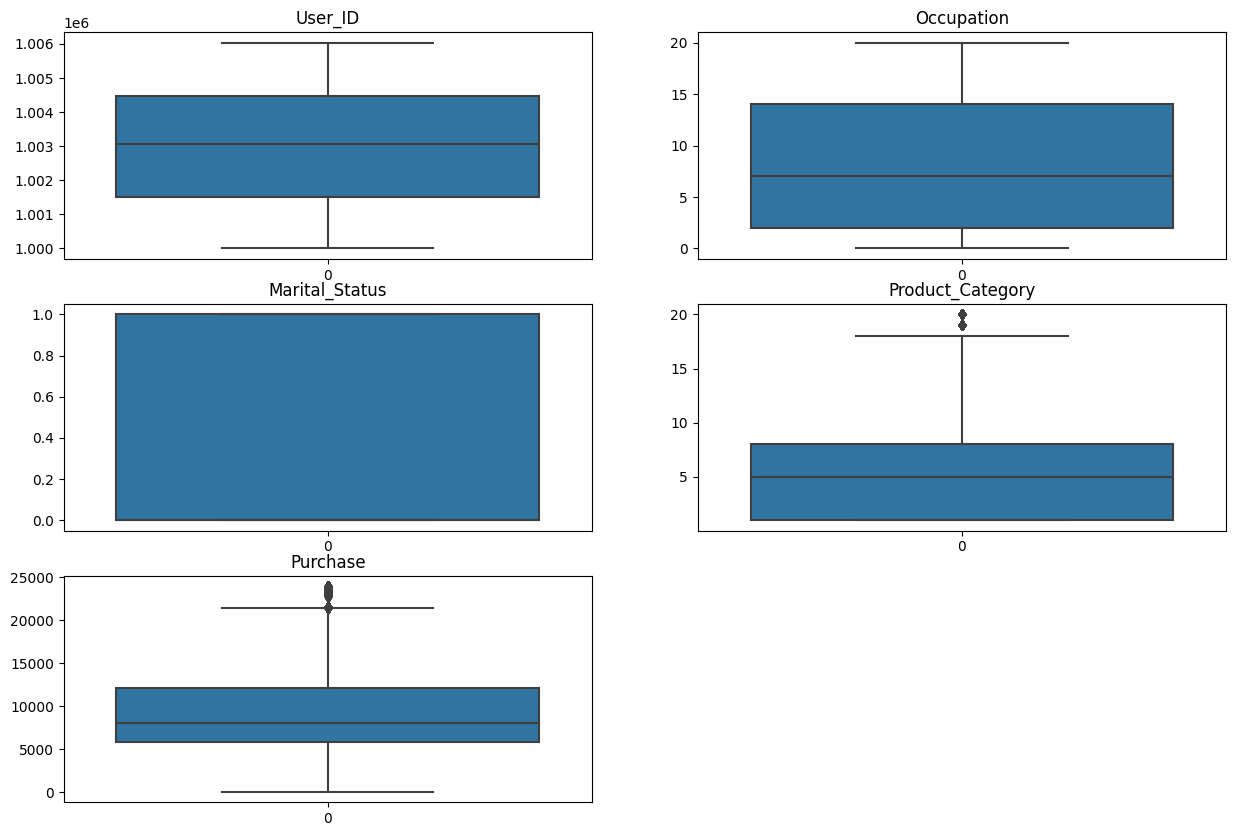

In [22]:
plt.figure(figsize=(15,10))
for i,x in enumerate(numeric_columns):
  plt.subplot(3,2,i+1)
  sns.boxplot(df[x])
  plt.title(x)

Observation: The outlier present in the Product Categoy and Purchase are not extreme,so we are not removing

# 3. Business Insights based on Non- Graphical and Visual Analysis

* From the pie chart Distribution of gender who made purchase is 75.3% male and 24.7% female
* FRom the pie chart 59 % sales are done by unmarried people and 41% married people
* From the count Most of the purchase in the walmart is made by the age group 26-35
* From the count plot High number of sale happens in the product category 1,5,8
* From the bar plot Both male and female has purchased on average of 8000
* There is no correlation among the variables from the heatmap





Analysis of purchase by Male and Female

# 4.1 Are women spending more money per transaction than men? Why or Why not?

In [ ]:
# - male_sample_means---> mean of 300 samples for 1000 times -- so standard deviation is the std dev of male_sample_means

In [94]:
print("Average sale by Male population:",np.round(np.mean(male_sample_means),2))
print("Average sale by Female population:",np.round(np.mean(female_sample_means),2))

Average sale by Male population: 9440.75
Average sale by Female population: 8727.67


Observation: Average amount spent by Male is greater than Female

Reason:

From the pie chart it can be inferred that dataset has around 71 percent sales done by male and around 28 percent sales are made by female. So the average sales made by female is less than male.

## 4.2 Confidence intervals and distribution of the mean of the expenses by female and male customers

### What is the confidence interval of average purchase made by male ?

In [95]:
# find sample average
sample_avg_male = np.round(np.mean(male_sample_means),2)
print(sample_avg_male)
sample_std_male = np.round(np.std(male_sample_means),2)
print(sample_std_male)

9440.75
283.16


In [96]:
# 90% confidence interval
norm.interval(confidence=0.9,loc=sample_avg_male,scale=sample_std_male)


(8974.99324699242, 9906.50675300758)

In [97]:
# 95% confidence interval
male_ci = norm.interval(confidence=0.95,loc=sample_avg_male,scale=sample_std_male)
male_ci

(8885.766598137638, 9995.733401862362)

In [98]:
# 99% confidence interval
norm.interval(confidence=0.99,loc=sample_avg_male,scale=sample_std_male)

(8711.378174407093, 10170.121825592907)

### What is the confidence interval of average purchase made by female ?

In [99]:
# find sample average
sample_avg_female = np.round(np.mean(female_sample_means),2)
print(sample_avg_female)
sample_std_female = np.round(np.std(female_sample_means),2)
print(sample_std_female)

8727.67
273.75


In [100]:
# 90% confidence interval
norm.interval(confidence=0.9,loc=sample_avg_female,scale=sample_std_female)


(8277.391319622035, 9177.948680377966)

In [101]:
# 95% confidence interval
female_ci = norm.interval(confidence=0.95,loc=sample_avg_female,scale=sample_std_female)
female_ci

(8191.12985923216, 9264.21014076784)

In [102]:
# 99% confidence interval
norm.interval(confidence=0.99,loc=sample_avg_female,scale=sample_std_female)

(8022.536728153489, 9432.803271846511)

## 4.3 Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

In [103]:
if male_ci[0]>=female_ci[0] and male_ci[1]>=female_ci[1]:
  overlap = True
else:
  overlap = False

print("Confidence Intervals Overlap:", overlap)

Confidence Intervals Overlap: True


Observation:

Confidence interval of average male and female spending overlaps, so there is no clear evidence which shows the difference in male and female customer.

* So we can increase the sample size and so std dev will reduce and chance of overlap also reduce
* Confidence interval can be reduced

In [ ]:
male_sample_means = [df[df["Gender"] == "M"].sample(1000, replace = True)["Purchase"].mean() for i in range(1000)]

In [ ]:
female_sample_means = [df[df["Gender"] == "F"].sample(1000, replace = True)["Purchase"].mean() for i in range(1000)]

In [ ]:
# find sample average
sample_avg_male = np.round(np.mean(male_sample_means),2)
print(sample_avg_male)
sample_std_male = np.round(np.std(male_sample_means),2)
print(sample_std_male)

9440.12
159.47


In [ ]:
# 95% confidence interval
male_ci = norm.interval(confidence=0.95,loc=sample_avg_male,scale=sample_std_male)
male_ci

(9127.564543385399, 9752.675456614603)

In [ ]:
# find sample average
sample_avg_female = np.round(np.mean(female_sample_means),2)
print(sample_avg_female)
sample_std_female = np.round(np.std(female_sample_means),2)
print(sample_std_female)

8733.38
149.03


In [ ]:
# 95% confidence interval
female_ci = norm.interval(confidence=0.95,loc=sample_avg_female,scale=sample_std_female)
female_ci

(8441.286567383995, 9025.473432616003)

### Here overlap is not happened, so we can conclude that Male is spending more than female with 95 percentage cofidence interval of male purchase (9127.564543385399, 9752.675456614603) and female purchase (8441.286567383995, 9025.473432616003)

## 4.4 Confidence intervals and distribution of the mean of the expenses by Married and Unmarried customers

In [40]:
df["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [41]:
married_purchase = df[df["Marital_Status"] == 1]["Purchase"]
unmarried_purchase = df[df["Marital_Status"] == 0]["Purchase"]

In [42]:
print("Average sale by married population:",np.round(np.mean(married_purchase),2))
print("Average sale by Unmarried population:",np.round(np.mean(unmarried_purchase),2))

Average sale by married population: 9261.17
Average sale by Unmarried population: 9265.91


Observation: Average amount spent by both married and unmarried customers are same

<Axes: xlabel='Purchase', ylabel='Count'>

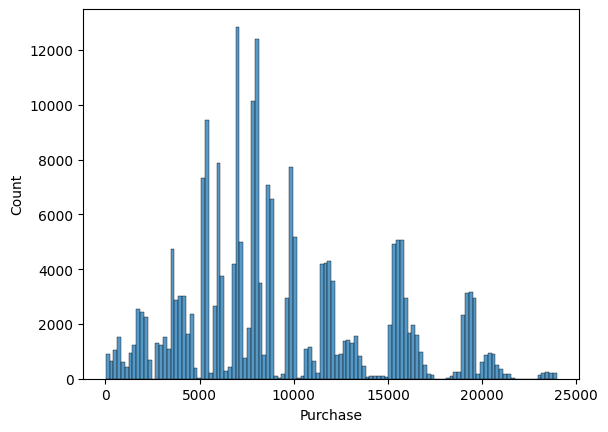

In [43]:
sns.histplot(married_purchase)

<Axes: xlabel='Purchase', ylabel='Count'>

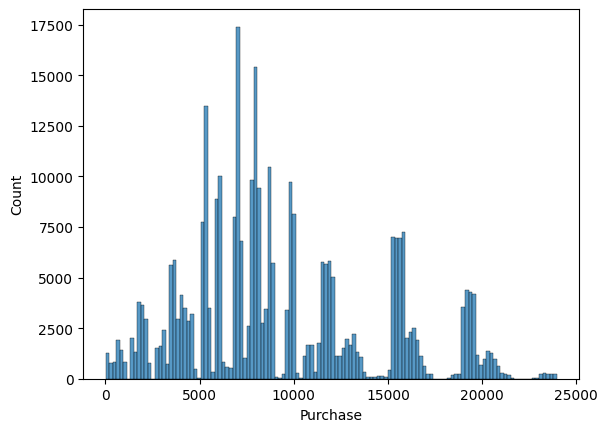

In [44]:
sns.histplot(unmarried_purchase)

### What is the confidence interval of average purchase made by married customer ?

In [45]:
sample_50_married = [np.mean(married_purchase.sample(100)) for i in range(1000)]

<Axes: ylabel='Count'>

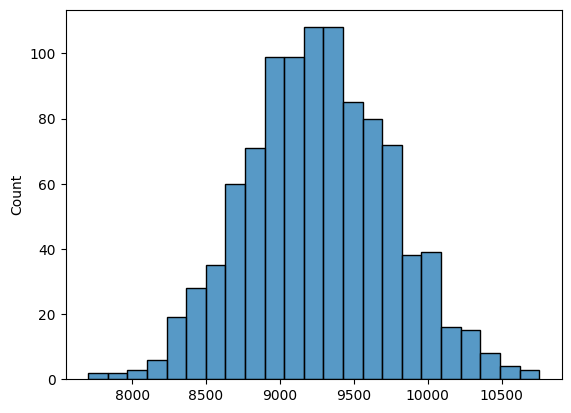

In [46]:
sns.histplot(sample_50_married)

By iterating with different samples, it is found that for samples greater than 100, there is no much change in the deviation. so sample size = 100

In [47]:
# find sample average
sample_avg_married = np.round(np.mean(married_purchase.sample(100)),2)
print(sample_avg_married)
sample_std_married = np.round(np.std(married_purchase.sample(100)),2)
print(sample_std_married)

9513.52
4804.1


In [48]:
# 90% confidence interval
married_ci = norm.interval(confidence=0.9,loc=sample_avg_married,scale=sample_std_married/np.sqrt(100))
married_ci

(8723.315869076243, 10303.724130923758)

In [49]:
# 95% confidence interval
norm.interval(confidence=0.95,loc=sample_avg_married,scale=sample_std_married/np.sqrt(100))

(8571.933702187112, 10455.106297812888)

In [50]:
# 99% confidence interval
norm.interval(confidence=0.99,loc=sample_avg_married,scale=sample_std_married/np.sqrt(100))

(8276.065844282073, 10750.974155717928)

### What is the confidence interval of average purchase made by unmarried customer ?

In [51]:
sample_50_unmarried = [np.mean(unmarried_purchase.sample(100)) for i in range(1000)]

<Axes: ylabel='Count'>

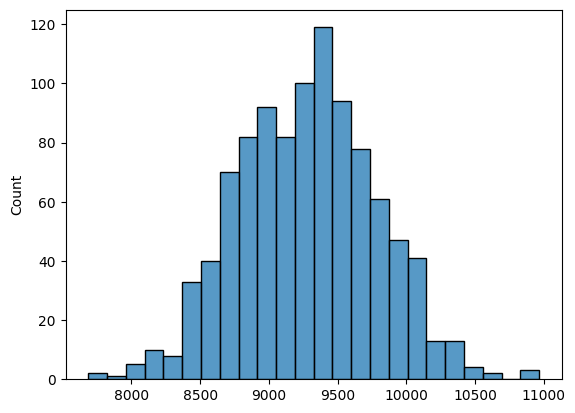

In [52]:
sns.histplot(sample_50_unmarried)

In [53]:
# find sample average
sample_avg_unmarried = np.round(np.mean(unmarried_purchase.sample(100)),2)
print(sample_avg_unmarried)
sample_std_unmarried = np.round(np.std(unmarried_purchase.sample(100)),2)
print(sample_std_unmarried)

8851.81
5117.86


In [54]:
# 90% confidence interval
unmarried_ci = norm.interval(confidence=0.9,loc=sample_avg_unmarried,scale=sample_std_unmarried/np.sqrt(100))
unmarried_ci

(8009.996941677013, 9693.623058322986)

In [55]:
# 95% confidence interval
norm.interval(confidence=0.95,loc=sample_avg_unmarried,scale=sample_std_unmarried/np.sqrt(100))

(7848.727872208184, 9854.892127791816)

In [56]:
# 99% confidence interval
norm.interval(confidence=0.99,loc=sample_avg_unmarried,scale=sample_std_unmarried/np.sqrt(100))

(7533.536624053922, 10170.083375946077)

Are confidence intervals of average marrried and unmarried spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

In [57]:
if married_ci[0]>=unmarried_ci[0] and married_ci[1]>=unmarried_ci[1]:
  overlap = True
else:
  overlap = False

print("Confidence Intervals Overlap:", overlap)

Confidence Intervals Overlap: True


Observation:

Confidence interval of average male and female spending overlaps, so there is no clear evidence which shows the difference in married and unmarried customer.

So we can look into Age parameter

## 4.5 Confidence intervals and distribution of the mean of the expenses by different Age group people

In [58]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [59]:
age_0to17 = df[df["Age"] == "0-17"]["Purchase"]
age_18to25 = df[df["Age"] == "18-25"]["Purchase"]
age_26to35 = df[df["Age"] == "26-35"]["Purchase"]
age_36to45 = df[df["Age"] == "36-45"]["Purchase"]
age_46to50 = df[df["Age"] == "46-50"]["Purchase"]
age_51to55 = df[df["Age"] == "51-55"]["Purchase"]
age_55more = df[df["Age"] == "55+"]["Purchase"]


In [60]:
print(f"Average sale by age_0to17 population: {np.round(np.mean(age_0to17), 2)}")
print(f"Average sale by age_18to25 population: {np.round(np.mean(age_18to25), 2)}")
print(f"Average sale by age_26to35 population: {np.round(np.mean(age_26to35), 2)}")
print(f"Average sale by age_36to45 population: {np.round(np.mean(age_36to45), 2)}")
print(f"Average sale by age_46to50 population: {np.round(np.mean(age_46to50), 2)}")
print(f"Average sale by age_51to55 population: {np.round(np.mean(age_51to55), 2)}")
print(f"Average sale by age_55more population: {np.round(np.mean(age_55more), 2)}")

Average sale by age_0to17 population: 8933.46
Average sale by age_18to25 population: 9169.66
Average sale by age_26to35 population: 9252.69
Average sale by age_36to45 population: 9331.35
Average sale by age_46to50 population: 9208.63
Average sale by age_51to55 population: 9534.81
Average sale by age_55more population: 9336.28


In [61]:
# find sample average
# age_0to17
sample_avg_age_0to17 = np.round(np.mean(age_0to17.sample(100)),2)
sample_std_age_0to17 = np.round(np.std(age_0to17.sample(100)),2)

# age_18to25
sample_avg_age_18to25 = np.round(np.mean(age_18to25.sample(100)),2)
sample_std_age_18to25 = np.round(np.std(age_18to25.sample(100)),2)

# age_26to35
sample_avg_age_26to35 = np.round(np.mean(age_26to35.sample(100)),2)
sample_std_age_26to35 = np.round(np.std(age_26to35.sample(100)),2)

# age_36to45
sample_avg_age_36to45 = np.round(np.mean(age_36to45.sample(100)),2)
sample_std_age_36to45 = np.round(np.std(age_36to45.sample(100)),2)

# age_46to50
sample_avg_age_46to50 = np.round(np.mean(age_46to50.sample(100)),2)
sample_std_age_46to50 = np.round(np.std(age_46to50.sample(100)),2)

# age_51to55
sample_avg_age_51to55 = np.round(np.mean(age_51to55.sample(100)),2)
sample_std_age_51to55 = np.round(np.std(age_51to55.sample(100)),2)

# age_55more
sample_avg_age_55more = np.round(np.mean(age_55more.sample(100)),2)
sample_std_age_55more = np.round(np.std(age_55more.sample(100)),2)


In [62]:
age_0to17_ci = norm.interval(confidence=0.9,loc=sample_avg_age_0to17,scale=sample_std_age_0to17/np.sqrt(100))
age_18to25_ci = norm.interval(confidence=0.9,loc=sample_avg_age_18to25,scale=sample_std_age_18to25/np.sqrt(100))
age_26to35_ci = norm.interval(confidence=0.9,loc=sample_avg_age_26to35,scale=sample_std_age_26to35/np.sqrt(100))
age_36to45_ci = norm.interval(confidence=0.9,loc=sample_avg_age_36to45,scale=sample_std_age_36to45/np.sqrt(100))
age_46to50_ci = norm.interval(confidence=0.9,loc=sample_avg_age_46to50,scale=sample_std_age_46to50/np.sqrt(100))
age_51to55_ci = norm.interval(confidence=0.9,loc=sample_avg_age_51to55,scale=sample_std_age_51to55/np.sqrt(100))
age_55more_ci = norm.interval(confidence=0.9,loc=sample_avg_age_55more,scale=sample_std_age_55more/np.sqrt(100))

In [63]:
print(f"CI for age_0to17 purchase mean: {age_0to17_ci}")
print(f"CI for age_18to25 purchase mean: {age_18to25_ci}")
print(f"CI for age_26-35 purchase mean: {age_26to35_ci}")
print(f"CI for age_36-45 purchase mean: {age_36to45_ci}")
print(f"CI for age_46-50 purchase mean: {age_46to50_ci}")
print(f"CI for age_51-55 purchase mean: {age_51to55_ci}")
print(f"CI for age_55more purchase mean: {age_55more_ci}")

CI for age_0to17 purchase mean: (7490.5668869181245, 9105.313113081877)
CI for age_18to25 purchase mean: (8766.880309911412, 10472.379690088586)
CI for age_26-35 purchase mean: (8395.914558789873, 10015.085441210125)
CI for age_36-45 purchase mean: (8506.803544860792, 10252.75645513921)
CI for age_46-50 purchase mean: (8951.746786125696, 10443.313213874306)
CI for age_51-55 purchase mean: (8615.57760569534, 10224.90239430466)
CI for age_55more purchase mean: (7874.446893235677, 9413.033106764322)


# 5. Final Insights - Illustrate the insights based on exploration and CLT

* From the pie chart Distribution of gender who made purchase is 75.3% male and 24.7% female
* From the pie chart 59 % sales are done by unmarried people and 41% married people
* From the count Most of the purchase in the walmart is made by the age group 26-35
* From the count plot High number of sale happens in the product category 1,5,8
* From the bar plot Both male and female has purchased on average of 8000
* There is no correlation among the variables from the heatmap

* Male is spending more than female with 95 percentage cofidence interval of male purchase (9127.564543385399, 9752.675456614603) and female purchase (8441.286567383995, 9025.473432616003) with 1000 samples

* Confidence interval of average male and female spending overlaps, so there is no clear evidence which shows the difference in male and female customer.

* So we can look into other parameters like Age, Marital Status

* The average purchase made by married customer in 95 % Confidence interval is between the range (8386.041016876135, 10429.718983123863) from 100 sample
T* he average purchase made by married customer in 95 % Confidence interval is between the range (7407.449700456589, 9551.65029954341) from 100 sample

CI for age_0to17 purchase mean: (9357.171023574467, 11124.108976425532)

CI for age_18to25 purchase mean: (8708.698691834014, 10289.281308165984)

CI for age_26-35 purchase mean: (8145.126946188972, 9711.873053811027)

CI for age_36-45 purchase mean: (9157.074286502451, 10720.905713497548)

CI for age_46-50 purchase mean: (7468.220243116578, 8979.159756883422)

CI for age_51-55 purchase mean: (9077.375934966254, 10613.304065033746)

CI for age_55more purchase mean: (9278.966393793602, 10959.493606206397)

# 6. Recommendations

Targeted Marketing:

The pie chart indicates a higher percentage of male customers making purchases. So gender-specific marketing campaigns can be developed to cater to the preferences of both male and female customers.

Marital Status Strategies:

The pie chart highlights a substantial proportion of sales from unmarried customers. Create promotions or loyalty programs targeting unmarried individuals Focusing on this segment can improve customer retention.

Age-Based Promotions:

The count plot emphasizes the high number of sales in the 26-35 age group, so design promotions and product offerings specifically for the age group 26-35

Product Category Focus:

More inventory and marketing efforts  can be made for product categories 1, 5, and 8.

*************** END ******************